<a href="https://colab.research.google.com/github/Goga270/HomeWork1_ML/blob/main/AI_HW1_Regression_with_inference_base_AladinskiyGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import joblib
import requests
import json

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Фиксация сидов в домашках делается для следующих целей.
- Для обеспечения воспроизводимости результатов, чтобы можно было тестить так же как студент
- Упрощение проверки заданий

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [8]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [9]:
# your code here
display(df_train.sample(10))

print()

display(df_test.head())
display(df_test.tail())

print()

display(df_train.columns[df_train.isnull().any()].tolist())

print()

display(df_test.columns[df_test.isnull().any()].tolist())

print()

print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

['mileage', 'engine', 'max_power', 'torque', 'seats']

['mileage', 'engine', 'max_power', 'torque', 'seats']


985
62


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0bfc3b4c14608082c97ec0e2661d6886ccca31d01e5edb109ca924e79020fdee
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [12]:
# your code here
import ipywidgets
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="ProfileReport", explorative=True)
profile.to_file("profiling_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
round(df_train.isna().sum() / df_train.shape[0] * 100, 2)

name             0.00
year             0.00
selling_price    0.00
km_driven        0.00
fuel             0.00
seller_type      0.00
transmission     0.00
owner            0.00
mileage          2.89
engine           2.89
max_power        2.80
torque           2.90
seats            2.89
dtype: float64

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [17]:
df_train[['mileage', 'engine', 'max_power', 'torque', 'seats']].head(3)

mileage   engine   max_power                    torque  seats
0   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm    5.0
1  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0
2   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0

In [19]:
import re
def extract_number(value):
    if pd.isnull(value):
        return np.nan
    match = re.search(r'[\d.]+', str(value))
    return float(match.group(0)) if match else np.nan

# Функция для обработки значения "torque"
def preprocess_torque(value):
    if pd.isnull(value):
        return np.nan
    match = re.search(r'([\d.]+)\s*(Nm|kgm)', str(value), re.IGNORECASE)
    if match:
        torque_value = float(match.group(1))
        if match.group(2).lower() == 'kgm':
            torque_value *= 9.80665  # Конвертируем из kgm в Nm
        return torque_value
    return np.nan

# Применение функций для обработки колонок
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(extract_number)
    df_test[col] = df_test[col].apply(extract_number)

df_train['torque'] = df_train['torque'].apply(preprocess_torque)
df_test['torque'] = df_test['torque'].apply(preprocess_torque)

# Заполнение пропусков медианами
for column in df_train.columns[df_train.isna().any()]:
    median_value = df_train[column].median()
    print(f"{column}: {median_value}")
    df_train[column].fillna(median_value, inplace=True)
    df_test[column].fillna(median_value, inplace=True)

# Проверка на пропущенные значения
print("Пропущенные значения в тренировочном наборе:")
print(df_train.isnull().sum())

print("Пропущенные значения в тестовом наборе:")
print(df_test.isnull().sum())

torque: nan
Пропущенные значения в тренировочном наборе:
name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage             0
engine              0
max_power           0
torque           6999
seats               0
dtype: int64
Пропущенные значения в тестовом наборе:
name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage             0
engine              0
max_power           0
torque           1000
seats               0
dtype: int64


<ipython-input-19-181400eef541>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(median_value, inplace=True)
<ipython-input-19-181400eef541>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [20]:
# your code here
df_train.drop('selling_price', axis=1).duplicated().sum()

1159

In [21]:
df_train.loc[df_train.drop('selling_price', axis=1).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  torque  seats  
254   1197.0      82.00     NaN    5.0  
258   1197.0      85.80     NaN    5.0  
268   1197.0      85.80     NaN    5.0  
324   1999.0     177.00     NaN    5.0  
325   2487.0     214.56     NaN    5.0  
...      ...        ...     ...    ...  
6947   995.0      62.00     NaN    5.0  
6984  1498.0      98.63     NaN    5.0  
6989  1248.0      74.00     NaN    5.0  
6997  1396.0      70.00     NaN    5.0  
6998  1396.0      70.00     NaN    5.0  

[1159 rows x 13 columns]

In [22]:
df_train = df_train[~df_train.drop(columns=['selling_price']).duplicated(keep="first")]

In [23]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [27]:
# your code here
# Часть задания уже получилось сделать выше
df_train.loc[:, ['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].astype(float)

In [29]:
df_train.drop(columns=['torque'], inplace=True)

<ipython-input-29-f795764491b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['torque'], inplace=True)


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 593.1+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [33]:
# your code here
df_train.loc[:, ['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [34]:
# your code here
display(df_train.describe(include=[float, int]))
display(df_test.describe(include=[float, int]))

print()

display(df_train.describe(include=['object']))
display(df_test.describe(include=['object']))

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power  torque        seats  
count  1000.000000     0.0  1000.000000  
mean     90.844330     NaN     5.403000  
std      34.892709     NaN     0.912921  
min      34.200000     NaN     4.000000  
25%      69.000000     NaN     5.000000  
50%      82.425000     NaN     5.000000  
75%     102.000000     NaN     5.000000  
max     280.000000     NaN     9.000000

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [40]:
assert df_train.shape == (5840, 13)
# разе не 12 надо??

AssertionError: 

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [41]:
%matplotlib inline

In [42]:
plt.ion()

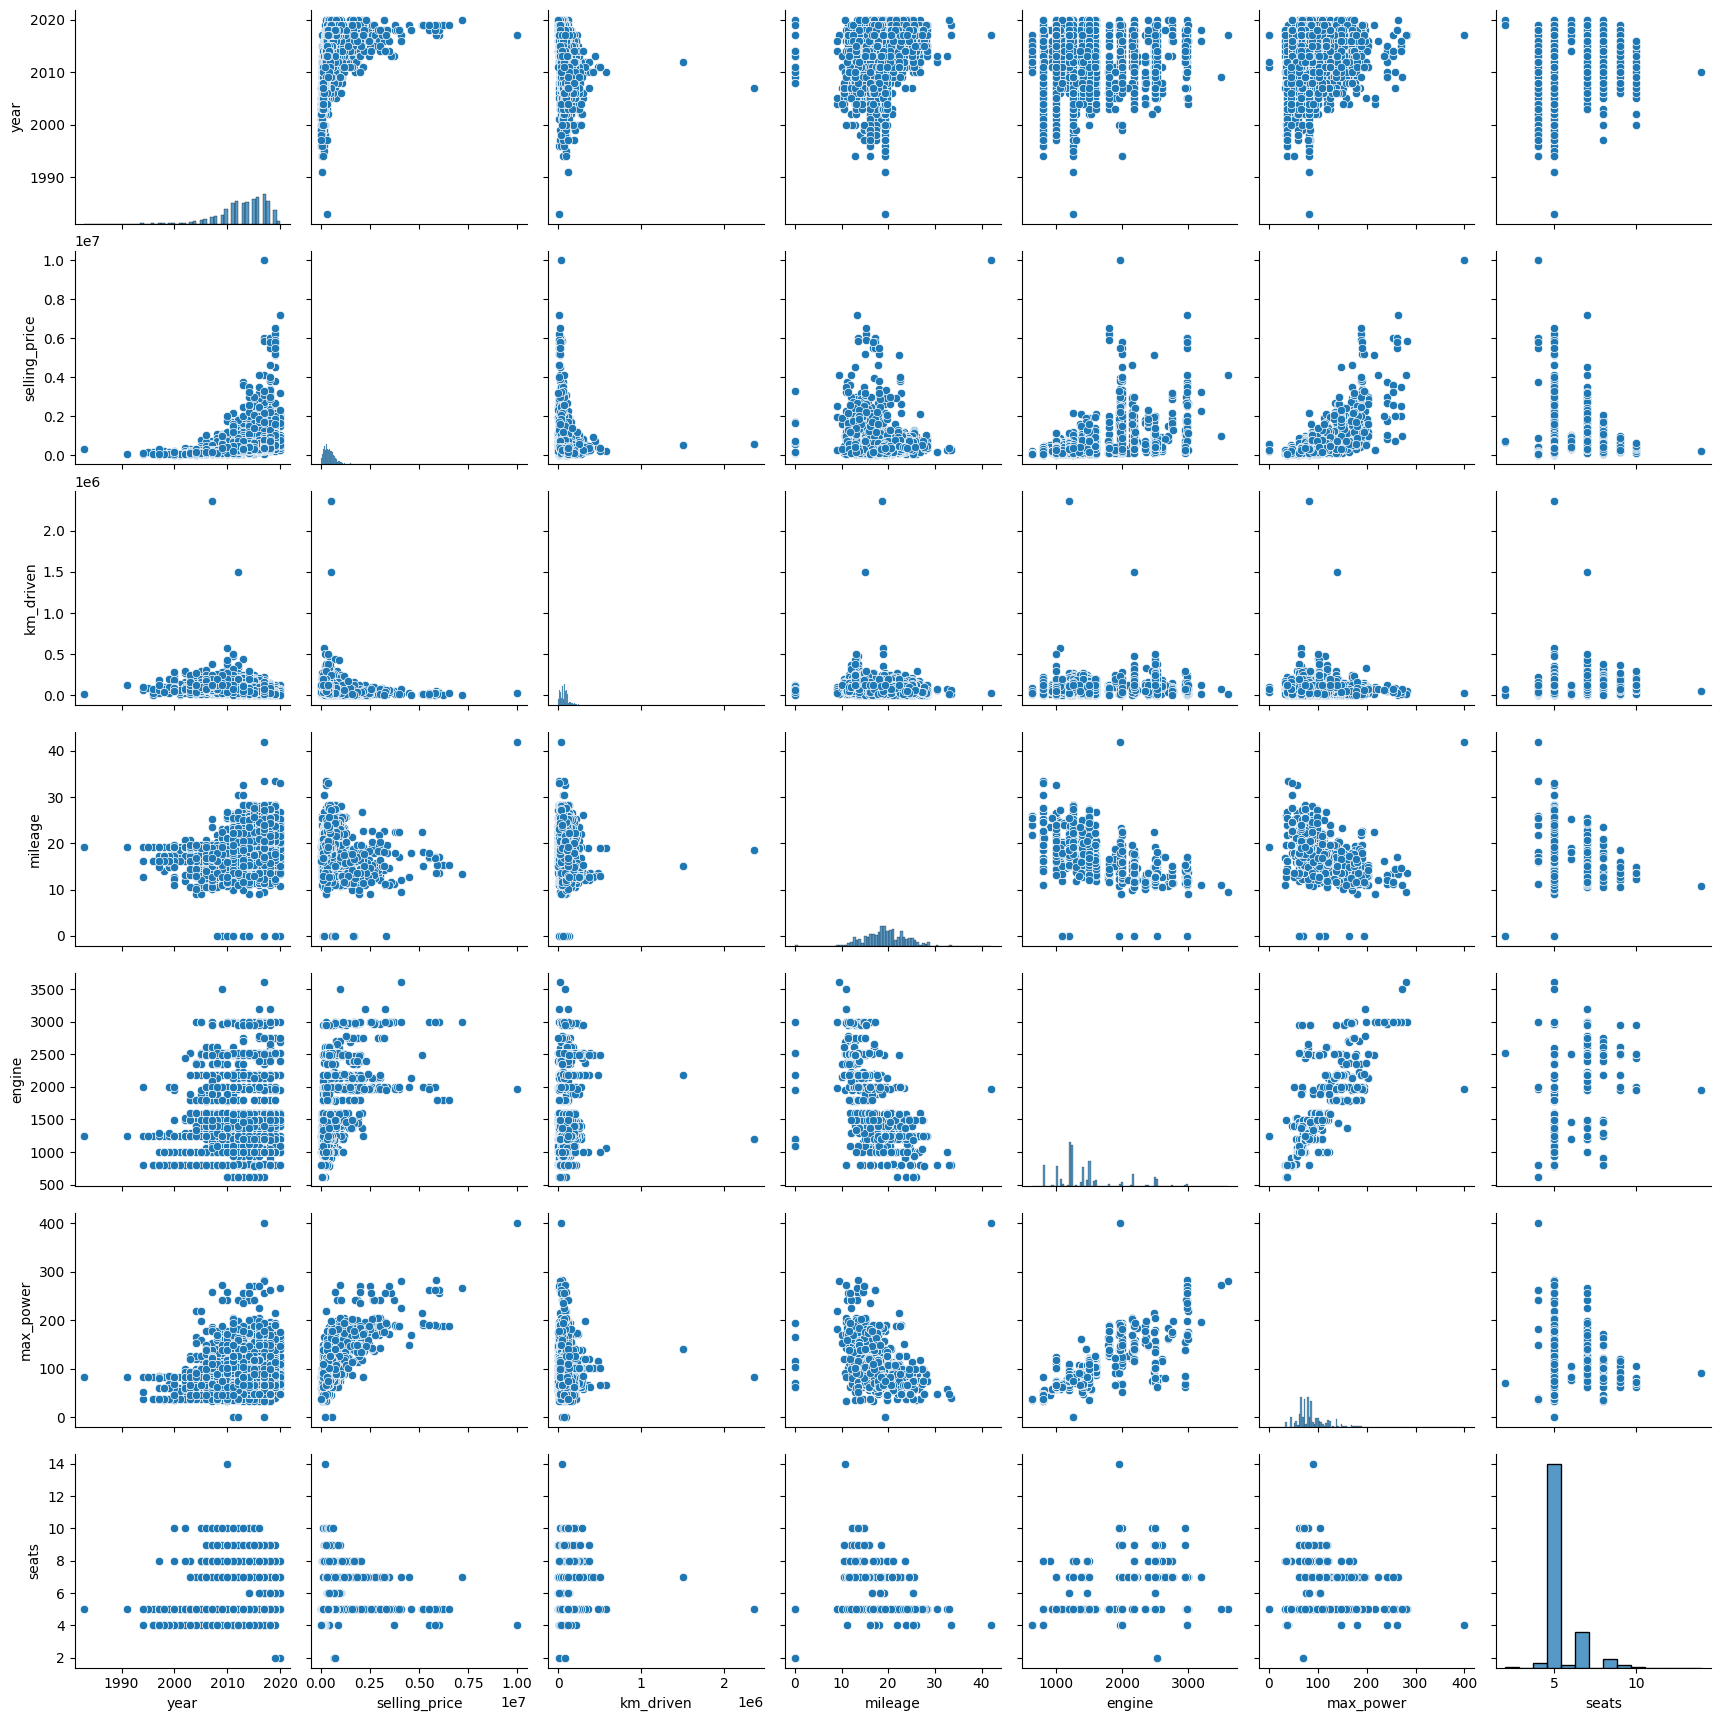

In [43]:
# your code here
sns.pairplot(df_train)
plt.show()

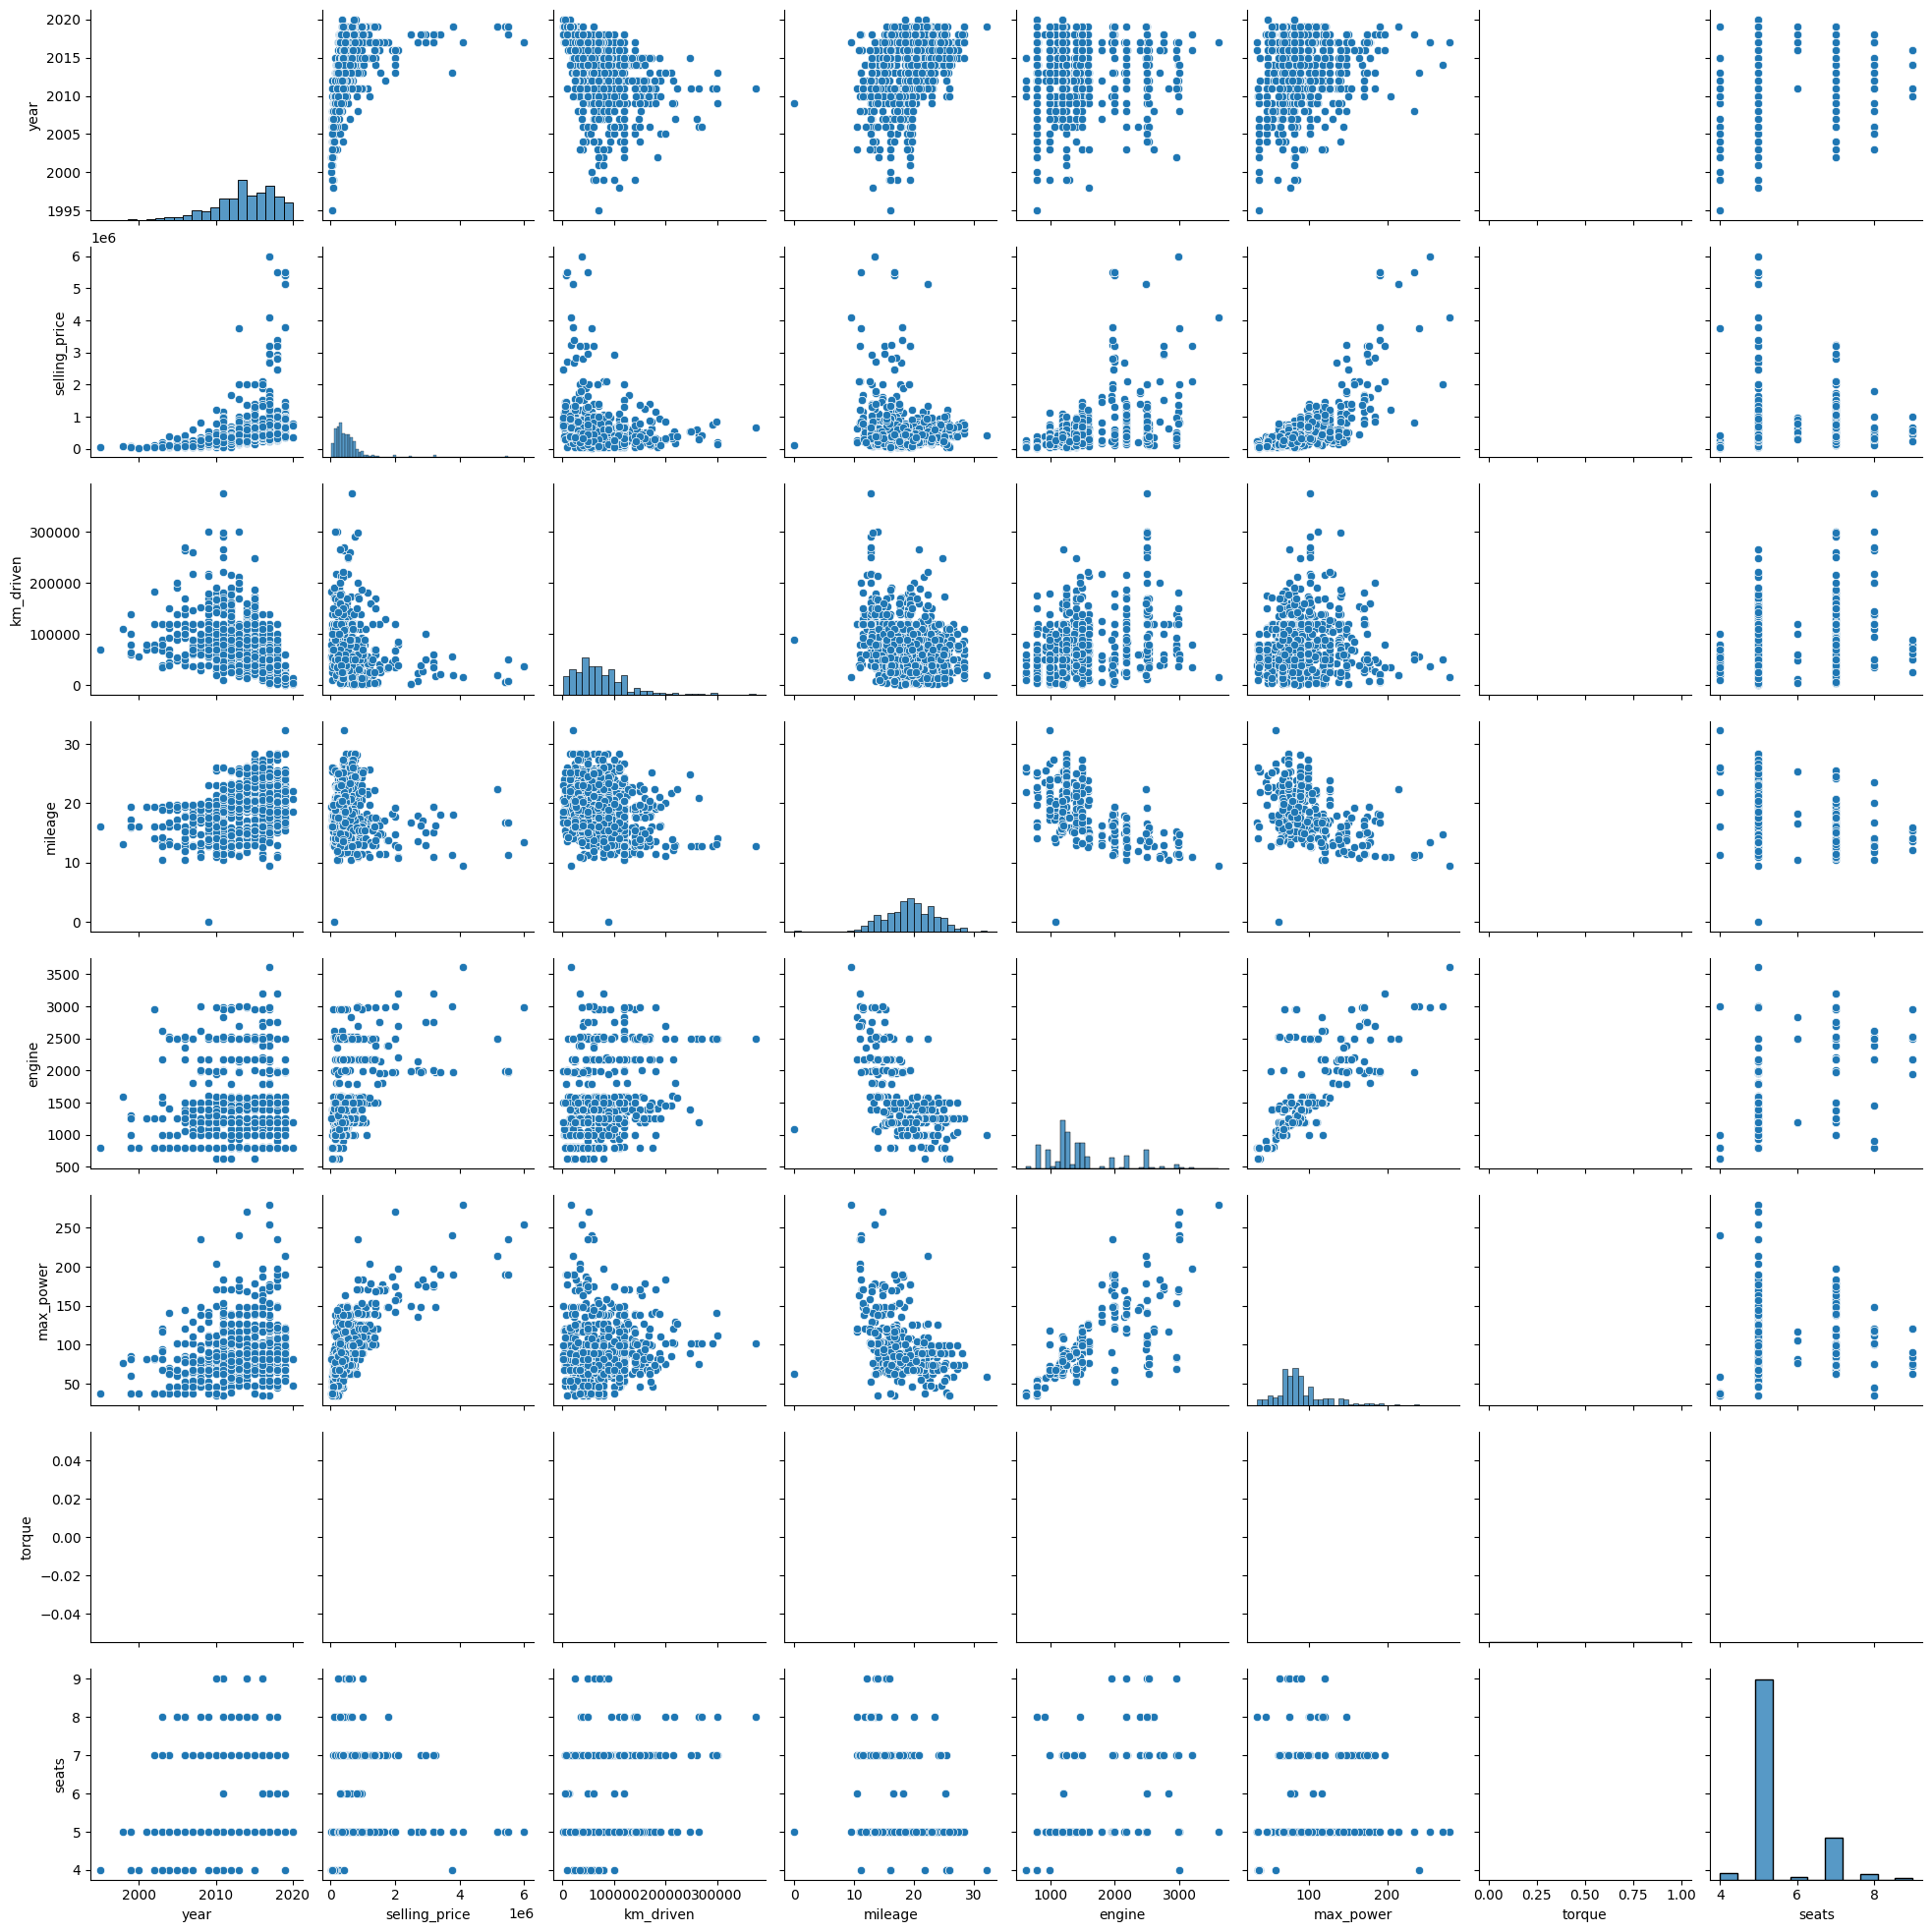

In [44]:
# your code here
sns.pairplot(df_test)

Можно видеть, что распределние данных похоже, однако test данные страдают сильной дисперсией. Возможно уменьшение корреляции.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


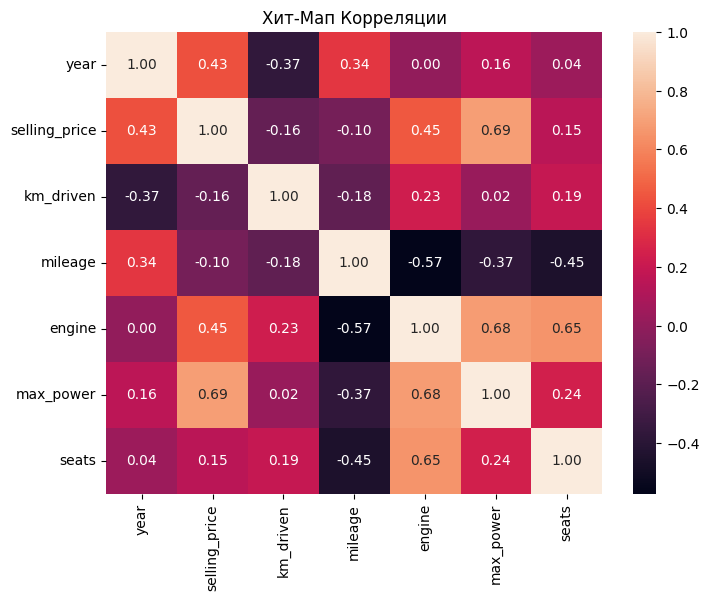

In [45]:
# your code here
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.select_dtypes(include=['int', 'float']).corr(), annot=True, fmt='.2f')
plt.title('Хит-Мап Корреляции')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Две характеристики с наименьшей корреляцией между собой - это "Год выпуска" и "Двигатель", коэффициент корреляции которых равен 0,00.

Между "Ценой продажи" и "максимальной мощностью" существует значительная положительная линейная зависимость с коэффициентом корреляции 0,69.

Да, основываясь на полученных данных, можно с уверенностью сказать, что чем старше автомобиль, тем больше километров он, вероятно, проехал на момент продажи. Это подтверждается отрицательным коэффициентом корреляции -0,37 между "Годом выпуска" и "Пройденным километражом".

Есть ли что-нибудь еще, что вы хотели бы обсудить или изучить?

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

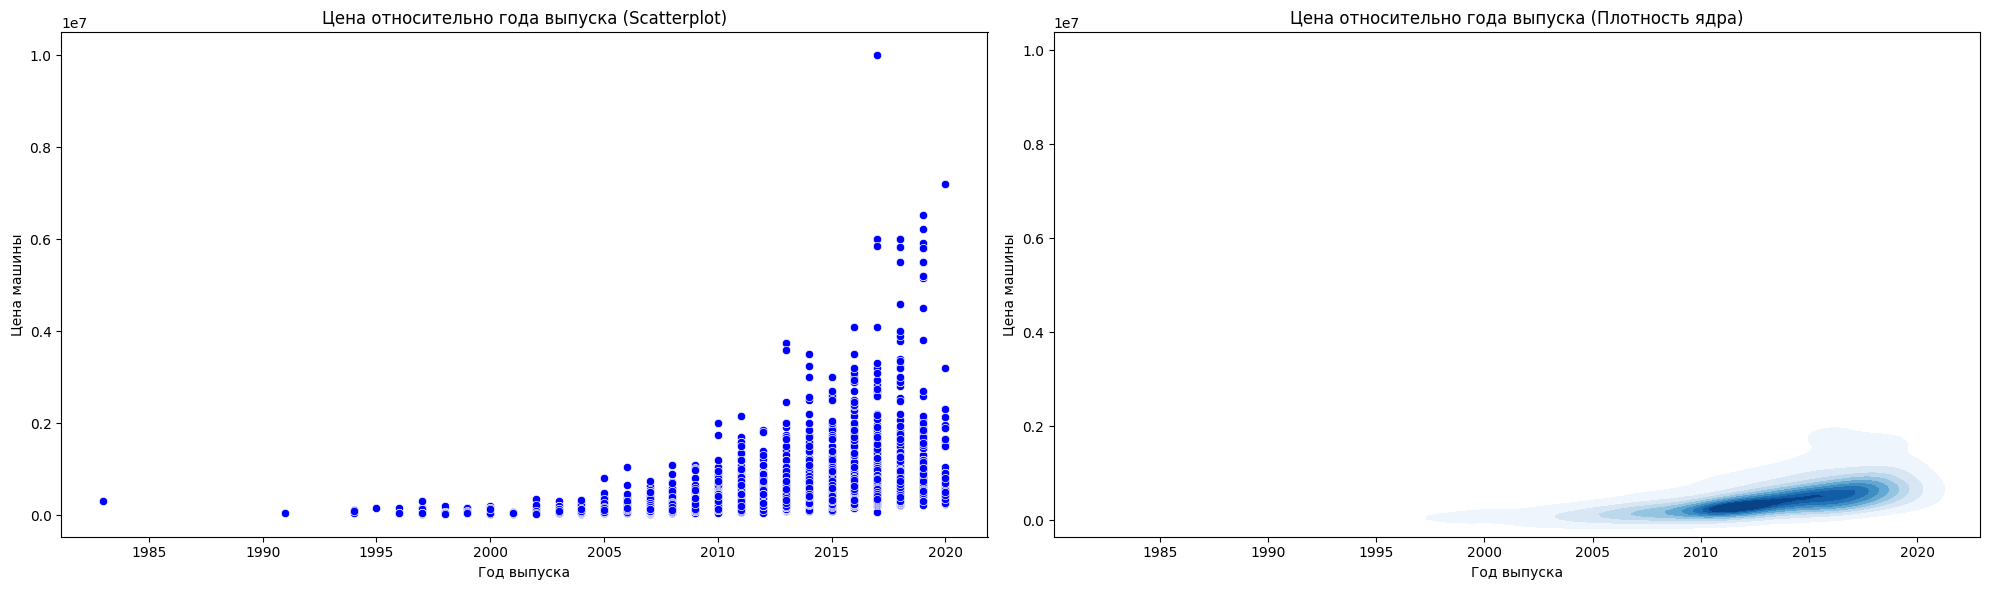

In [46]:
# your code here
fig, axs = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})

sns.scatterplot(x=df_train['year'], y=df_train['selling_price'], ax=axs[0], color='blue')
axs[0].set_title('Цена относительно года выпуска (Scatterplot)')
axs[0].set_xlabel('Год выпуска')
axs[0].set_ylabel('Цена машины')

sns.kdeplot(x=df_train['year'], y=df_train['selling_price'], cmap='Blues', fill=True, thresh=0.05, ax=axs[1])
axs[1].set_title('Цена относительно года выпуска (Плотность ядра)')
axs[1].set_xlabel('Год выпуска')
axs[1].set_ylabel('Цена машины')

plt.tight_layout()
plt.show()

Можно заметить, что большинство машин из выборки были выпущены с 2010 по 2015 года. Однако мы всё же можем наблюдать положительную корреляцию цены автомобиля относительно её года выпуска. Это подтверждает и корреляция Пирсона: 43%

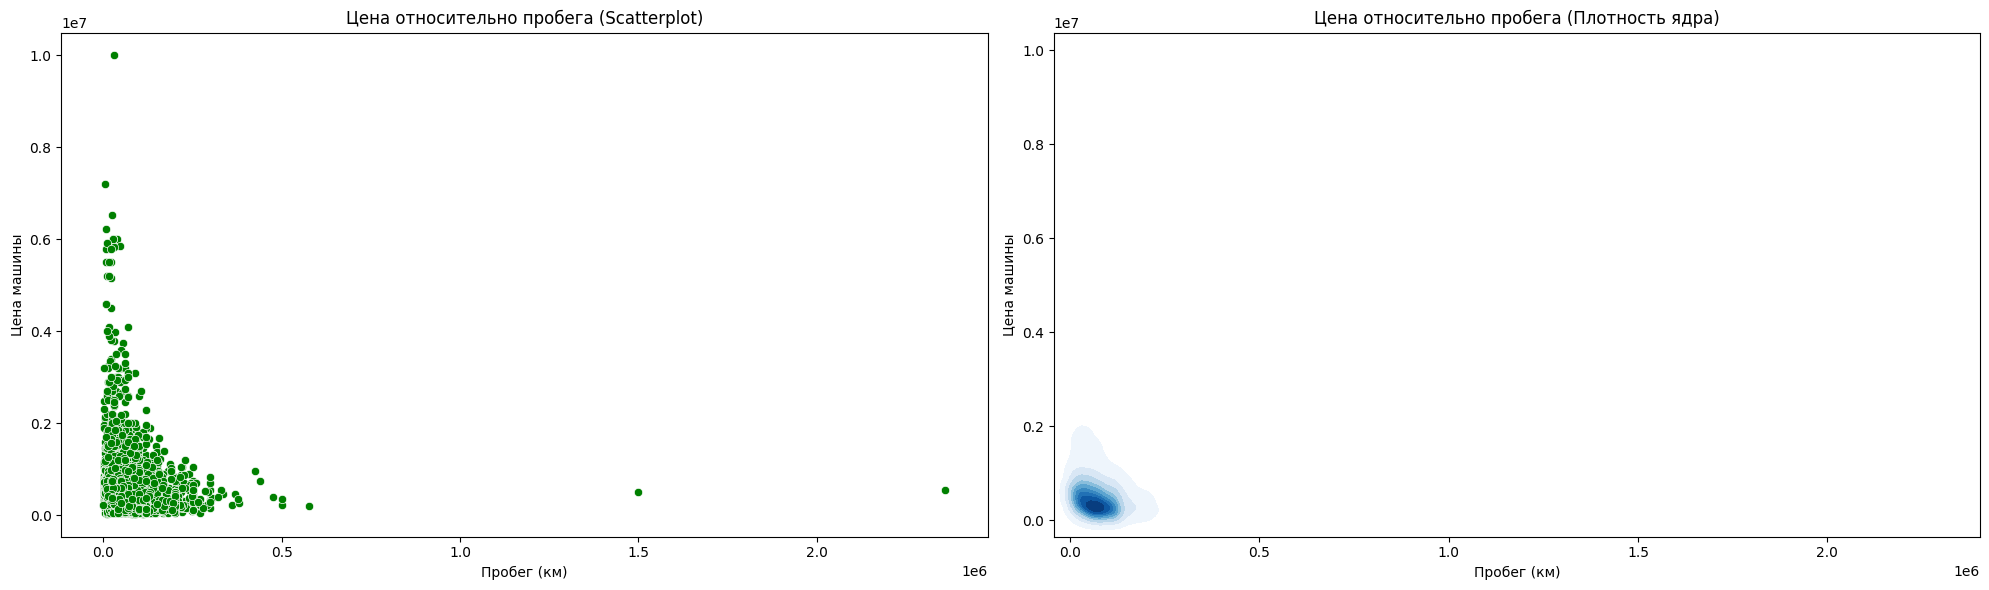

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1]})

sns.scatterplot(x=df_train['km_driven'], y=df_train['selling_price'], ax=axs[0], color='green')
axs[0].set_title('Цена относительно пробега (Scatterplot)')
axs[0].set_xlabel('Пробег (км)')
axs[0].set_ylabel('Цена машины')

sns.kdeplot(x=df_train['km_driven'], y=df_train['selling_price'], cmap='Blues', fill=True, thresh=0.05, ax=axs[1])
axs[1].set_title('Цена относительно пробега (Плотность ядра)')
axs[1].set_xlabel('Пробег (км)')
axs[1].set_ylabel('Цена машины')

plt.tight_layout()
plt.show()

Явно нельзя сказать, что цена сильно зависит от пробега, однако отрицательная корреляция всё же наблюдается между этими величинами.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [48]:
y_train = df_train['selling_price'].copy()
X_train = df_train.select_dtypes(include=["int", "float"]).drop(columns=['selling_price']).copy()

In [49]:
X_train

year  km_driven  mileage  engine  max_power  seats
0     2014     145500    23.40    1248      74.00      5
1     2014     120000    21.14    1498     103.52      5
2     2010     127000    23.00    1396      90.00      5
3     2007     120000    16.10    1298      88.20      5
4     2017      45000    20.14    1197      81.86      5
...    ...        ...      ...     ...        ...    ...
6992  2008     191000    17.92    1086      62.10      5
6993  2013      50000    18.90     998      67.10      5
6994  2013     110000    18.50    1197      82.85      5
6995  2007     119000    16.80    1493     110.00      5
6996  2009     120000    19.30    1248      73.90      5

[5840 rows x 6 columns]

In [50]:
assert X_train.shape == (5840, 6)

In [51]:
y_test = df_test['selling_price'].copy()
X_test = df_test.select_dtypes(include=["int", "float"]).drop(columns=['selling_price']).copy()

In [53]:
X_test

year  km_driven  mileage  engine  max_power  torque  seats
0    2010     168000    14.00  2498.0     112.00     NaN    7.0
1    2017      25000    21.50  1497.0     108.50     NaN    5.0
2    2007     218463    12.90  1799.0     130.00     NaN    5.0
3    2015     173000    25.10  1498.0      98.60     NaN    5.0
4    2011      70000    16.50  1172.0      65.00     NaN    5.0
..    ...        ...      ...     ...        ...     ...    ...
995  2008     100000    19.81  1086.0      68.05     NaN    5.0
996  2017      50000    18.60  1197.0      81.83     NaN    5.0
997  2009      40000    23.00  1396.0      90.00     NaN    5.0
998  2012      25000    20.36  1197.0      78.90     NaN    5.0
999  2016     110000    26.00  1498.0      98.60     NaN    5.0

[1000 rows x 7 columns]

In [54]:
X_test.drop(columns=['torque'], inplace=True)

In [55]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression().fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)
mse_train = MSE(y_train, predictions_train)
mse_test = MSE(y_test, predictions_test)


print(f'Train R2: {r2_train:.2f}')
print(f'Test R^: {r2_test:.2f}')
print(f'Train MSE: {mse_train:.2f}')
print(f'Test MSE: {mse_test:.2f}')

Train R2: 0.59
Test R^: 0.59
Train MSE: 116873067751.52
Test MSE: 233297548204.61


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]

(array([[ 0.13956959,  1.19115249,  0.99641312, -0.37364298, -0.4397015 ,
         -0.43441899],
        [ 0.13956959,  0.76661943,  0.42938385,  0.14116151,  0.49338685,
         -0.43441899],
        [-0.83716668,  0.88315792,  0.89605396, -0.06887872,  0.06603744,
         -0.43441899],
        [-1.56971888,  0.76661943, -0.83514162, -0.27068208,  0.00914181,
         -0.43441899],
        [ 0.8721218 , -0.48200722,  0.17848594, -0.4786631 , -0.19125724,
         -0.43441899]]),
 array([[-0.83716668,  1.56574049, -1.36202722,  2.20037946,  0.76142848,
          1.60170212],
        [ 0.8721218 , -0.81497433,  0.51970709,  0.13910229,  0.65079809,
         -0.43441899],
        [-1.56971888,  2.40586644, -1.63801492,  0.76098611,  1.33038479,
         -0.43441899],
        [ 0.38375366,  1.64898227,  1.42293957,  0.14116151,  0.33787212,
         -0.43441899],
        [-0.59298261, -0.06579834, -0.73478245, -0.53014355, -0.72417965,
         -0.43441899]]))

In [58]:
model = LinearRegression().fit(X_train_scaled, y_train)
predictions_train = model.predict(X_train_scaled)
predictions_test = model.predict(X_test_scaled)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)
mse_train = MSE(y_train, predictions_train)
mse_test = MSE(y_test, predictions_test)


print(f'Train R2: {r2_train:.2f}')
print(f'Test R2: {r2_test:.2f}')
print(f'Train MSE: {mse_train:.2f}')
print(f'Test MSE: {mse_test:.2f}')

Train R2: 0.59
Test R2: 0.59
Train MSE: 116873067751.52
Test MSE: 233297548204.60


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [59]:
# your code here
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefs': model.coef_,
    'abs coefs': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values(by='abs coefs', ascending=False)
feature_importance

feature          coefs      abs coefs
4  max_power  322779.703236  322779.703236
0       year  152843.262358  152843.262358
3     engine   61176.857150   61176.857150
1  km_driven  -44148.047511   44148.047511
2    mileage   28781.086595   28781.086595
5      seats  -23220.570226   23220.570226

max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [60]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train_scaled, y_train)
lasso_predictions_train = lasso_model.predict(X_train_scaled)
lasso_predictions_test = lasso_model.predict(X_test_scaled)

lasso_r2_train = r2_score(y_train, lasso_predictions_train)
lasso_r2_test = r2_score(y_test, lasso_predictions_test)
lasso_mse_train = MSE(y_train, lasso_predictions_train)
lasso_mse_test = MSE(y_test, lasso_predictions_test)


print(f'Lasso Train R2: {lasso_r2_train:.2f}')
print(f'Lasso Test R2: {lasso_r2_test:.2f}')
print(f'Lasso Train MSE: {lasso_mse_train:.2f}')
print(f'Lasso Test MSE: {lasso_mse_test:.2f}')

Lasso Train R2: 0.59
Lasso Test R2: 0.59
Lasso Train MSE: 116873067761.64
Lasso Test MSE: 233298219170.76


In [61]:
# your code here
lasso_model.coef_

array([152843.08385345, -44146.91853785,  28779.20408499,  61172.02578008,
       322780.58619708, -23217.69327311])

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso_grid_search = GridSearchCV(
    estimator=Lasso(),
    param_grid=param_grid,
    cv=10
)

lasso_grid_search.fit(X_train_scaled, y_train)
best_model = lasso_grid_search.best_estimator_
lasso_grid_search_predictions_train = best_model.predict(X_train_scaled)
lasso_grid_search_predictions_test = best_model.predict(X_test_scaled)

lasso_grid_search_r2_train = r2_score(y_train, lasso_grid_search_predictions_train)
lasso_grid_search_r2_test = r2_score(y_test, lasso_grid_search_predictions_test)
lasso_grid_search_mse_train = MSE(y_train, lasso_grid_search_predictions_train)
lasso_grid_search_mse_test = MSE(y_test, lasso_grid_search_predictions_test)


print(f'Lasso Train R2: {lasso_grid_search_r2_train:.2f}')
print(f'Lasso Test R2: {lasso_grid_search_r2_test:.2f}')
print(f'Lasso Train MSE: {lasso_grid_search_mse_train:.2f}')
print(f'Lasso Test MSE: {lasso_grid_search_mse_test:.2f}')

Lasso Train R2: 0.59
Lasso Test R2: 0.59
Lasso Train MSE: 116873166388.83
Lasso Test MSE: 233364631456.10


In [63]:
print('Моделей обучено:', len(param_grid['alpha']) * 10)

Моделей обучено: 50


In [65]:
print(f'Коэффициент регуляризации у лучшей из перебранных моделей:', lasso_grid_search.best_estimator_.coef_)
print('Нулевые коэфы:', (best_model.coef_ == 0).sum())

Коэффициент регуляризации у лучшей из перебранных моделей: [152819.5529717  -44037.83207098  28601.04061998  60701.69450513
 322866.99092623 -22933.37348536]
Нулевые коэфы: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [66]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.2, 0.5, 0.8]
}

elasticnet_grid_search = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param_grid_elastic,
    cv=10
)

elasticnet_grid_search.fit(X_train_scaled, y_train)
best_model = elasticnet_grid_search.best_estimator_
elasticnet_grid_search_predictions_train = best_model.predict(X_train_scaled)
elasticnet_grid_search_predictions_test = best_model.predict(X_test_scaled)

elasticnet_grid_search_r2_train = r2_score(y_train, elasticnet_grid_search_predictions_train)
elasticnet_grid_search_r2_test = r2_score(y_test, elasticnet_grid_search_predictions_test)
elasticnet_grid_search_mse_train = MSE(y_train, elasticnet_grid_search_predictions_train)
elasticnet_grid_search_mse_test = MSE(y_test, elasticnet_grid_search_predictions_test)


print(f'ElasticNet Train R2: {elasticnet_grid_search_r2_train:.2f}')
print(f'ElasticNet Test R2: {elasticnet_grid_search_r2_test:.2f}')
print(f'ElasticNet Train MSE: {elasticnet_grid_search_mse_train:.2f}')
print(f'ElasticNet Test MSE: {elasticnet_grid_search_mse_test:.2f}')

ElasticNet Train R2: 0.58
ElasticNet Test R2: 0.55
ElasticNet Train MSE: 120401116931.79
ElasticNet Test MSE: 258065928926.31


In [67]:
print('Моделей обучено:', len(param_grid_elastic['alpha']) * len(param_grid_elastic['l1_ratio']) * 10)

print(f'Гиперпараметры лучшей (по выбранной метрике качества) из перебранных моделей: alpha', elasticnet_grid_search.best_params_['alpha'], 'и l1_ratio', elasticnet_grid_search.best_params_['l1_ratio'])

Моделей обучено: 150
Гиперпараметры лучшей (по выбранной метрике качества) из перебранных моделей: alpha 1 и l1_ratio 0.8


In [68]:
elasticnet_grid_search.best_estimator_.coef_

array([138638.48630786, -46102.02627205,  18134.4127467 ,  84092.03800197,
       254115.14819164, -21037.53857584])

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [73]:
del df_train['name']
del df_test['name']

KeyError: 'name'

#Выше ошибка так как уже удалил эти столбцы

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [72]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [77]:
print(df_test.select_dtypes(include=["int", "float"]).columns)
print(X_test_scaled.shape)


Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats'],
      dtype='object')
(1000, 6)


In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features_train = encoder.fit_transform(df_train[['seats', 'fuel', 'seller_type', 'owner', 'transmission']])
encoded_columns_train = encoder.get_feature_names_out(['seats', 'fuel', 'seller_type', 'owner', 'transmission'])
encoded_df_train = pd.DataFrame(encoded_features_train, columns=encoded_columns_train)

encoded_features_test = encoder.transform(df_test[['seats', 'fuel', 'seller_type', 'owner', 'transmission']])
encoded_columns_test = encoder.get_feature_names_out(['seats', 'fuel', 'seller_type', 'owner', 'transmission'])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoded_columns_test)

data_train = pd.concat([pd.DataFrame(X_train_scaled, columns = df_train.select_dtypes(include=["int", "float"]).columns.drop('selling_price')),
                        encoded_df_train], axis=1)
data_test = pd.concat([
    pd.DataFrame(X_test_scaled,
                 columns=df_test.select_dtypes(include=["int", "float"]).columns.drop(['selling_price', 'torque'])),
    encoded_df_test
], axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    cv=10
)

ridge_grid_search.fit(data_train, y_train)
best_model = ridge_grid_search.best_estimator_
ridge_grid_search_predictions_train = best_model.predict(data_train)
ridge_grid_search_predictions_test = best_model.predict(data_test)

ridge_grid_search_r2_train = r2_score(y_train, ridge_grid_search_predictions_train)
ridge_grid_search_r2_test = r2_score(y_test, ridge_grid_search_predictions_test)
ridge_grid_search_mse_train = MSE(y_train, ridge_grid_search_predictions_train)
ridge_grid_search_mse_test = MSE(y_test, ridge_grid_search_predictions_test)


print(f'Ridge Train R2: {ridge_grid_search_r2_train:.2f}')
print(f'Ridge Test R2: {ridge_grid_search_r2_test:.2f}')
print(f'Ridge Train MSE: {ridge_grid_search_mse_train:.2f}')
print(f'Ridge Test MSE: {ridge_grid_search_mse_test:.2f}')

Ridge Train R2: 0.65
Ridge Test R2: 0.65
Ridge Train MSE: 99219210834.90
Ridge Test MSE: 203828979380.88


# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [81]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.abs(y_true - y_pred) / y_true <= 0.1) / len(y_true)

ridge_metric = business_metric(y_test, ridge_grid_search_predictions_test)
lasso_metric = business_metric(y_test, lasso_grid_search_predictions_test)
elasticnet_metric = business_metric(y_test, elasticnet_grid_search_predictions_test)

print(f'Ridge: {ridge_metric:.2%}')
print(f'Lasso: {lasso_metric:.2%}')
print(f'ElasticNet: {elasticnet_metric:.2%}')

Ridge: 24.60%
Lasso: 22.70%
ElasticNet: 24.90%


ElasticNet V1

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

